# Capstone 3 EDA
---

## Table of Contents
---
1. [Data Summary](#first-bullet)
    1. [Summary Statistics](#second-bullet)
    2. [Summary Stats by Channel](#third-bullet)
2. [Engagement Stats by Channel ](#fourth-bullet)
    1. [Engagement Rates](#fifth-bullet)
3. [Text Analysis (Tokens)](#sixth-bullet)
    1. [Word Counts](#seventh-bullet)
    2. [TFIDF Weights](#eigth-bullet)
    3. [Popular Comments](#ninth-bullet)
4. [Text Analysis (n-grams)](#tenth-bullet)
    1. [Bigrams](#eleventh-bullet)
    2. [Trigrams](#twelfth-bullet)

## 1. Data Summary <a class="anchor" id="first-bullet"></a>
***

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
youtube_comments = pd.read_csv('Cap3_DataWrangling.csv')


### A. Summary Statistics <a class="anchor" id="second-bullet"></a>

In [100]:
youtube_comments.shape

(14329, 8)

In [101]:
youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             14329 non-null  object 
 1   comment_text         14329 non-null  object 
 2   comment_likes        14329 non-null  float64
 3   video_title          14329 non-null  object 
 4   channel_title        14329 non-null  object 
 5   video_views          14329 non-null  int64  
 6   video_likes          14329 non-null  int64  
 7   video_comment_count  14329 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 895.7+ KB


In [102]:
youtube_comments.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,comment_likes,video_views,video_likes,video_comment_count
count,14329.00,14329.00,14329.00,14329.00
mean,59.19,379225.38,5903.83,4296.36
std,293.65,535900.76,8825.21,5685.72
min,0.00,8923.00,153.00,192.00
25%,0.00,65428.00,915.00,900.00
50%,3.00,172970.00,2250.00,2344.00
75%,23.00,528265.00,6378.00,5495.00
max,12093.00,3527470.00,51100.00,40155.00


In [103]:
youtube_comments.sample(5, random_state =343)

,video_id,comment_text,comment_likes,video_title,channel_title,video_views,video_likes,video_comment_count
10745,ja48GqBAWH8,I'm so happy Jerry is doing well!!,26.0,Hear doctor&#39;s grim prognosis for unvaccina...,CNN,304768,5403,3806
8607,oGmkepc6ITc,Lies,0.0,Covid Has Killed More Americans Than The 1918 ...,MSNBC,52041,685,916
6118,ro3RY8PcJU4,"Pi, Rho, Sigma variants will be interesting",0.0,U.S. Sets Fresh Record For Daily Covid Cases,MSNBC,16073,281,320
9125,lH4GyWzBNGw,He needs to be charged by the DOJ for any just...,557.0,Explosive Report: Trump Admin &#39;Criminally ...,MSNBC,699554,14399,5495
2456,YnSPqHK5POY,Because Midterms.... Well said Trey.,19.0,Trey Gowdy: COVID politics have trumped science,Fox News,128528,4106,834


In [104]:
video_channels = youtube_comments['channel_title'].unique()
print('There are {} youtube channels included in this dataset.'.format(len(video_channels)))
print('The channels are {}, {}, and {}.'.format(*video_channels))


video_count = len(youtube_comments['video_id'].unique())
comment_count = len(youtube_comments)
print ('The dataset contains {} comments ' 
       'from {} videos regarding Covid-19'.format(comment_count,video_count))

There are 3 youtube channels included in this dataset.
The channels are Fox News, MSNBC, and CNN.
The dataset contains 14329 comments from 147 videos regarding Covid-19


### B. Summary Stats by Channel  <a class="anchor" id="third-bullet"></a>

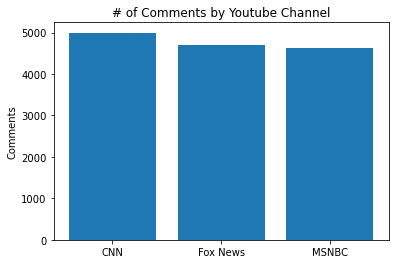

CNN         4998
Fox News    4699
MSNBC       4632
Name: channel_title, dtype: int64


In [105]:
comment_dist = youtube_comments['channel_title'].value_counts()

plt.bar(comment_dist.index, comment_dist)
plt.ylabel('Comments')
plt.title('# of Comments by Youtube Channel')
plt.show()

print(comment_dist)

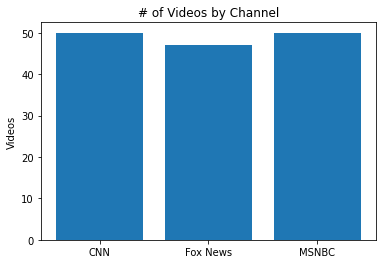

    Channel  Video Count
0       CNN           50
1  Fox News           47
2     MSNBC           50


In [106]:
videos_grouped = youtube_comments.groupby('channel_title')['video_id'].unique()


video_dist = [[videos_grouped.index[x], len(videos_grouped[x])] 
              for x in np.arange(len(videos_grouped))]
video_dist = pd.DataFrame(video_dist, columns=['Channel','Video Count'])

plt.bar(video_dist['Channel'],video_dist['Video Count'])
plt.ylabel('Videos')
plt.title('# of Videos by Channel')
plt.show()

print(video_dist)

We can see that three news networks are almost equally represent in number of videos and number of comments

## 2. Engagement Stats by Channel  <a class="anchor" id="fourth-bullet"></a>
---

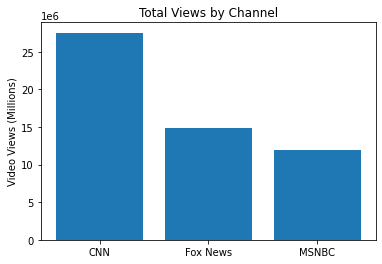

channel_title
CNN         27551239
Fox News    14940248
MSNBC       11979158
Name: video_views, dtype: int64

In [107]:
video_views = youtube_comments.\
    drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_views'].sum()

plt.bar(video_views.index, video_views)
plt.ylabel('Video Views (Millions)')
plt.ticklabel_format(axis ='y', scilimits = (6,6))
plt.title('Total Views by Channel')
plt.show()

video_views

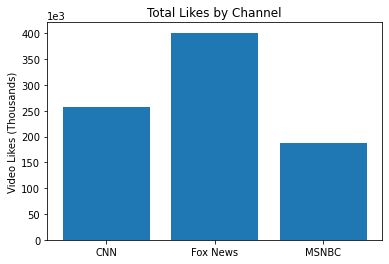

channel_title
CNN         258341
Fox News    401424
MSNBC       188039
Name: video_likes, dtype: int64

In [108]:
video_likes = youtube_comments.drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_likes'].sum()

plt.bar(video_likes.index, video_likes)
plt.ticklabel_format(axis ='y', scilimits = (3,3))
plt.ylabel('Video Likes (Thousands)')
plt.title('Total Likes by Channel')
plt.show()

video_likes

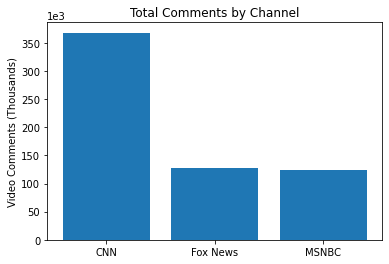

channel_title
CNN         367835
Fox News    126736
MSNBC       123113
Name: video_comment_count, dtype: int64

In [109]:
video_comment_count = youtube_comments.drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_comment_count'].sum()

plt.bar(video_comment_count.index, video_comment_count)
plt.ticklabel_format(axis ='y', scilimits = (3,3))
plt.ylabel('Video Comments (Thousands)')
plt.title('Total Comments by Channel')
plt.show()

video_comment_count

API limits to max 15000 comments with 3 channels.  Only a small sample of the total comments is taken for the sample video comments.  We can see that CNN draws the most views and comments in this sample of videos.  Fox videos have the most likes in this sample of videos. 

### A. Engagement Rates <a class="anchor" id="fifth-bullet"></a>

In [110]:
video_like_rate = video_likes/video_views
video_like_rate

channel_title
CNN         0.009377
Fox News    0.026869
MSNBC       0.015697
dtype: float64

In [111]:
video_comment_count/video_views

channel_title
CNN         0.013351
Fox News    0.008483
MSNBC       0.010277
dtype: float64

We can see that Fox news has the highest percentage of views which lead to likes.  And CNN has the highest percentage of views which lead to comments.

## 3. Text Analysis (Tokens) <a class="anchor" id="sixth-bullet"></a>
---

In [112]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

from collections import Counter
from wordcloud import WordCloud

from matplotlib.colors import ListedColormap

In [113]:
lower_yt_comments = [comment.lower() for comment in youtube_comments['comment_text']]

token_yt_comments = [word_tokenize(comment) for comment in lower_yt_comments] 

alpha_only_yt_tokens =  [[token for token in comment if token.isalpha() and len(token)>1] for comment in token_yt_comments] 

no_stop_tokens = [[token for token in comment if token not in stopwords.words('english')] for comment in alpha_only_yt_tokens]

youtube_comments['comments_tokens'] = no_stop_tokens
youtube_comments['comments_tokens_size'] = [len(x) for x in youtube_comments['comments_tokens']]

In [114]:
Q1 = youtube_comments['comments_tokens_size'].quantile(0.25)
Q3 = youtube_comments['comments_tokens_size'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


lower_bound = (youtube_comments['comments_tokens_size'] > (Q1 - 1.5 * IQR)) 
upper_bound = (youtube_comments['comments_tokens_size'] < (Q3 + 1.5 * IQR))


youtube_comments = youtube_comments[ lower_bound &upper_bound]


len(youtube_comments)


8.0


13144

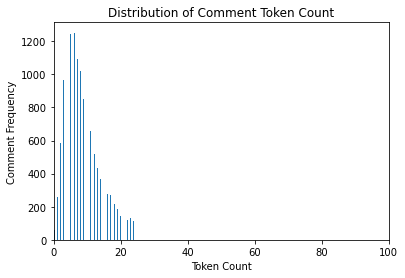

count    13144.000000
mean         8.644400
std          5.225232
min          0.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         24.000000
Name: comments_tokens_size, dtype: float64


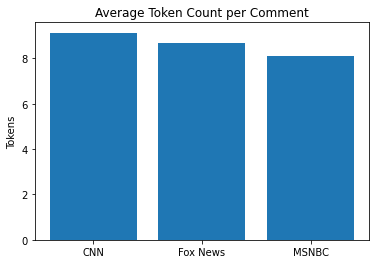

channel_title
CNN         9.137334
Fox News    8.669982
MSNBC       8.104425
Name: comments_tokens_size, dtype: float64


In [115]:
plt.hist(youtube_comments['comments_tokens_size'],bins =100)
plt.xlim(xmin=0, xmax = 100)
plt.xlabel('Token Count')
plt.ylabel('Comment Frequency')
plt.title('Distribution of Comment Token Count')
plt.show()

print(youtube_comments['comments_tokens_size'].describe())


avg_token_count = youtube_comments.groupby('channel_title')['comments_tokens_size'].mean()
plt.bar(avg_token_count.index, avg_token_count)
plt.title('Average Token Count per Comment')
plt.ylabel('Tokens')
plt.show()

print(avg_token_count)


The mean token count for all the comments in this sample is 11.69 tokens.  When stratified by news network, CNN's mean token count is above the total mean token count, while Fox and MSNBC are below the mean.

#### A. Word Counts <a class="anchor" id="seventh-bullet"></a>

In [116]:
def create_wordcloud(dictionary, title, scheme):
    
    cnn_cmap = ['red','white']
    fox_cmap = ['red','white','blue']
    msnbc_cmap = ['gold','orange','red','slateblue','cornflowerblue','lime']
    
    col = {'cnn': cnn_cmap, 'fox': fox_cmap, 'msnbc': msnbc_cmap}
    
    wordcloud = WordCloud(max_font_size=60,
                          max_words=50,
                          background_color="black",
                          scale = 10, 
                          colormap = ListedColormap(col.get(scheme)))
    
    wordcloud_im = wordcloud.generate_from_frequencies(dictionary)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud_im, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize =20, y = 1.02, style = 'oblique')
    plt.show()
    
    
    

In [117]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tokens = youtube_comments[cnn_mask]['comments_tokens'].sum()
MSNBC_tokens = youtube_comments[msnbc_mask]['comments_tokens'].sum()
FOX_tokens = youtube_comments[fox_mask]['comments_tokens'].sum()

cnn_token_counts = Counter(CNN_tokens)
fox_token_counts = Counter(FOX_tokens)
msnbc_token_counts = Counter(MSNBC_tokens)

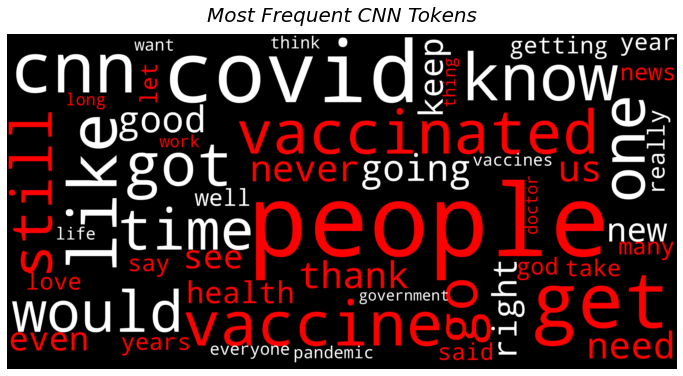

In [118]:
create_wordcloud(cnn_token_counts,'Most Frequent CNN Tokens','cnn')

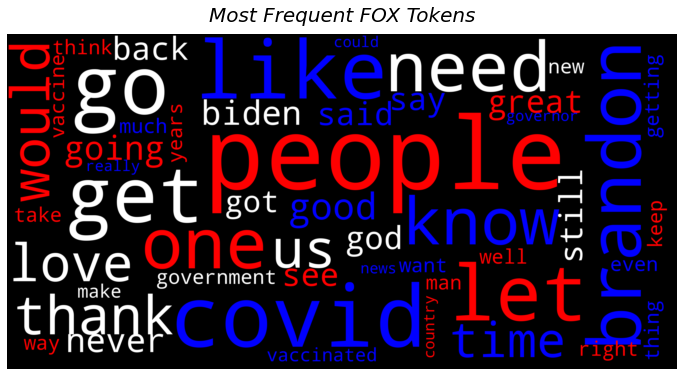

In [119]:
create_wordcloud(fox_token_counts, 'Most Frequent FOX Tokens','fox')


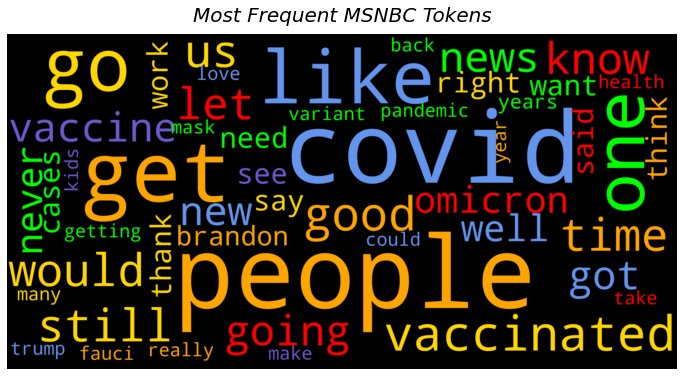

In [120]:
create_wordcloud(msnbc_token_counts, 'Most Frequent MSNBC Tokens', 'msnbc')

#### B. TFIDF <a class="anchor" id="eigth-bullet"></a>

In [121]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tokens = youtube_comments[cnn_mask]['comments_tokens'].sum()
MSNBC_tokens = youtube_comments[msnbc_mask]['comments_tokens'].sum()
FOX_tokens = youtube_comments[fox_mask]['comments_tokens'].sum()

In [122]:
all_tokens = [CNN_tokens, FOX_tokens, MSNBC_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_words =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}


fox_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}


msnbc_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}
 


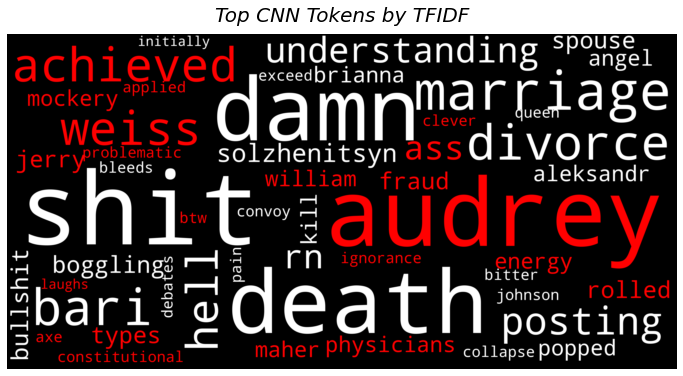

In [123]:
create_wordcloud(cnn_tfidf_wt_words, 'Top CNN Tokens by TFIDF','cnn')

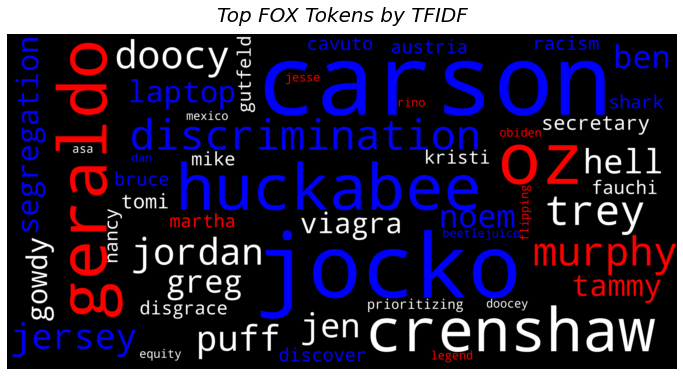

In [124]:
create_wordcloud(fox_tfidf_wt_words, 'Top FOX Tokens by TFIDF','fox' )

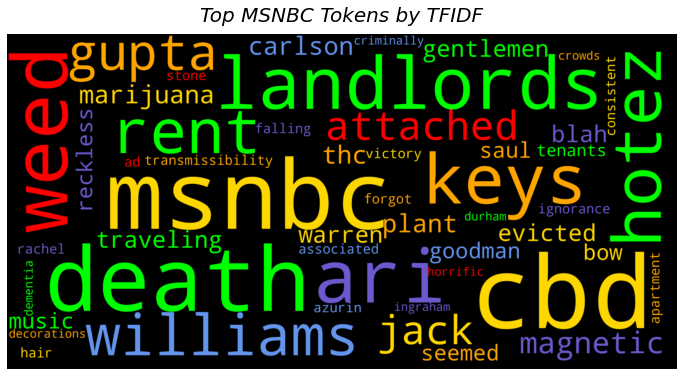

In [125]:
create_wordcloud(msnbc_tfidf_wt_words, 'Top MSNBC Tokens by TFIDF','msnbc')

#### C. Popular Comments <a class="anchor" id="ninth-bullet"></a>

##### i. Counts

In [126]:
cnn_mask = youtube_comments['channel_title']=='CNN'
fox_mask = youtube_comments['channel_title']=='Fox News'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

cnn_most_liked = youtube_comments[cnn_mask].nlargest(100, 'comment_likes')
fox_most_liked = youtube_comments[fox_mask].nlargest(100, 'comment_likes')
msnbc_most_liked = youtube_comments[msnbc_mask].nlargest(100, 'comment_likes')

liked_cnn_tokens =  cnn_most_liked['comments_tokens'].sum()
liked_fox_tokens =  fox_most_liked['comments_tokens'].sum()
liked_msnbc_tokens = msnbc_most_liked['comments_tokens'].sum()

liked_cnn_token_counts = Counter(liked_cnn_tokens)
liked_fox_token_counts = Counter(liked_fox_tokens)
liked_msnbc_token_counts = Counter(liked_msnbc_tokens)

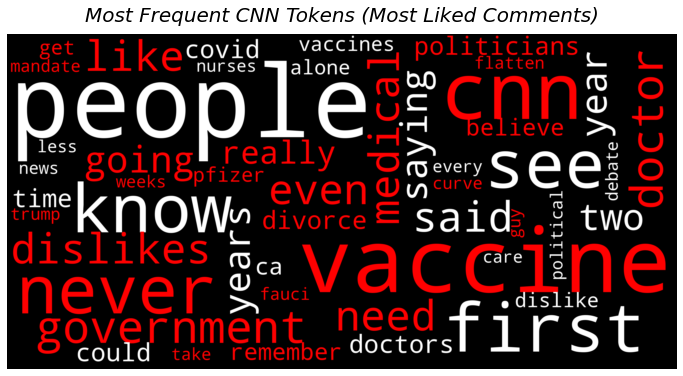

In [127]:
create_wordcloud(liked_cnn_token_counts,'Most Frequent CNN Tokens (Most Liked Comments)','cnn')

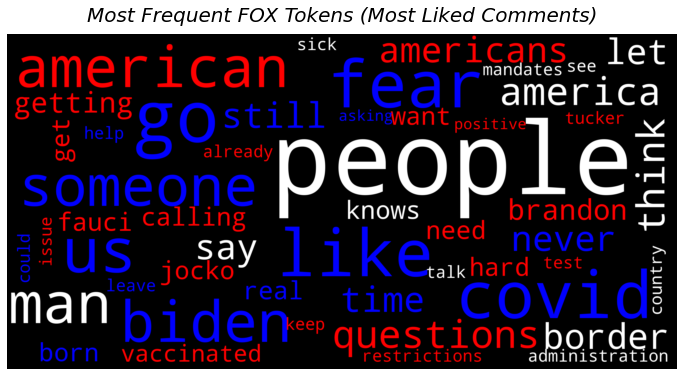

In [128]:
create_wordcloud(liked_fox_token_counts,'Most Frequent FOX Tokens (Most Liked Comments)','fox')

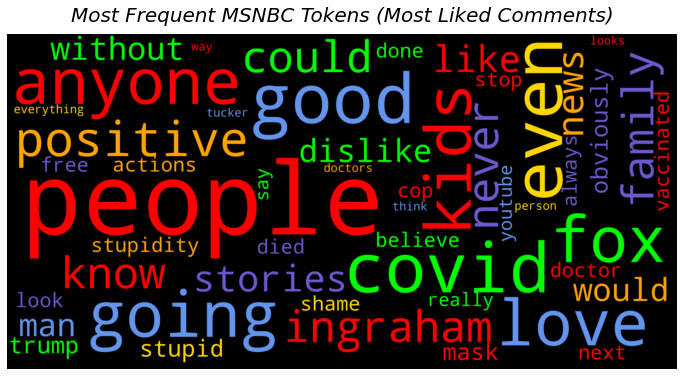

In [129]:
create_wordcloud(liked_msnbc_token_counts,'Most Frequent MSNBC Tokens (Most Liked Comments)', 'msnbc')

##### ii. TFIDF

In [130]:
all_tokens = [liked_cnn_tokens,
              liked_fox_tokens,
              liked_msnbc_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_words =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}
 

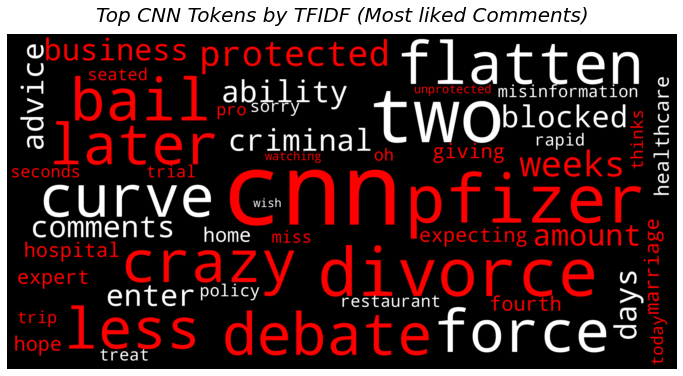

In [131]:
create_wordcloud(cnn_tfidf_wt_words,'Top CNN Tokens by TFIDF (Most liked Comments)','cnn')

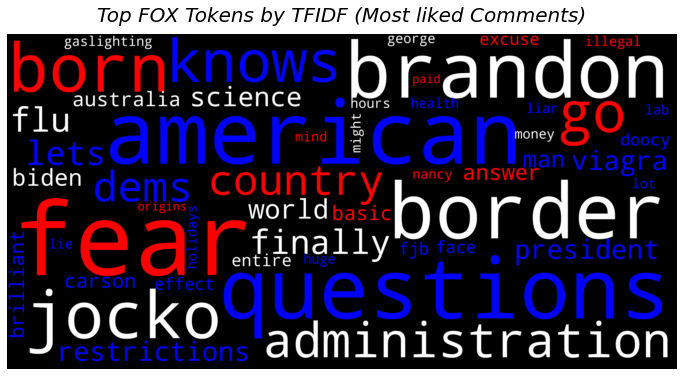

In [132]:
create_wordcloud(fox_tfidf_wt_words,'Top FOX Tokens by TFIDF (Most liked Comments)','fox')

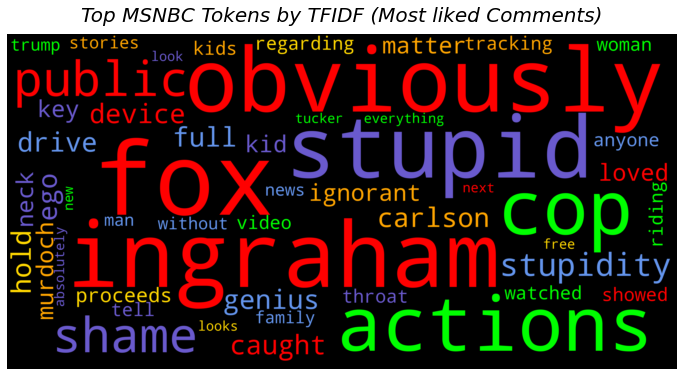

In [133]:
create_wordcloud(msnbc_tfidf_wt_words,'Top MSNBC Tokens by TFIDF (Most liked Comments)','msnbc')

## 4. Text Analysis (n-grams) <a class="anchor" id="tenth-bullet"></a>
---

In [134]:
import nltk
from nltk.util import bigrams
from nltk.util import trigrams


In [135]:
lower_yt_comments = [comment.lower() for comment in youtube_comments['comment_text']]

token_yt_comments = [word_tokenize(comment) for comment in lower_yt_comments] 

alpha_only_yt_tokens =  [[token for token in comment if token.isalpha() and len(token)>1] for comment in token_yt_comments]

no_stop_tokens = [[token for token in comment if token not in stopwords.words('english')] for comment in alpha_only_yt_tokens]


### A. Bigrams <a class="anchor" id="eleventh-bullet"></a>

In [136]:
bigram_var = [bigrams(comment) for comment in no_stop_tokens]
bigram_list = [list(bigram) for bigram in bigram_var]
bigram_tokens = [[' '.join(tupl) for tupl in b_list] for b_list in bigram_list]

youtube_comments['bigrams'] = bigram_tokens

In [137]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_bi_tokens = youtube_comments[cnn_mask]['bigrams'].sum()
FOX_bi_tokens = youtube_comments[fox_mask]['bigrams'].sum()
MSNBC_bi_tokens = youtube_comments[msnbc_mask]['bigrams'].sum()

CNN_bi_counts  = Counter(CNN_bi_tokens) 
FOX_bi_counts = Counter(FOX_bi_tokens)
MSNBC_bi_counts = Counter(MSNBC_bi_tokens)

In [138]:
CNN_bi_counts.most_common(20)

[('let go', 50),
 ('god bless', 48),
 ('go brandon', 47),
 ('fully vaccinated', 43),
 ('gon na', 34),
 ('got covid', 28),
 ('know lying', 24),
 ('many people', 23),
 ('new york', 23),
 ('two years', 22),
 ('get vaccinated', 21),
 ('thank god', 21),
 ('health care', 20),
 ('natural immunity', 19),
 ('doctors nurses', 19),
 ('healthcare workers', 19),
 ('wear mask', 19),
 ('last year', 18),
 ('feel like', 18),
 ('know know', 18)]

In [139]:
FOX_bi_counts.most_common(20)

[('go brandon', 161),
 ('let go', 159),
 ('god bless', 74),
 ('gon na', 33),
 ('thank god', 25),
 ('peter doocy', 25),
 ('southern border', 24),
 ('fox news', 22),
 ('got covid', 21),
 ('side effects', 20),
 ('federal solution', 19),
 ('white house', 18),
 ('people need', 18),
 ('natural immunity', 18),
 ('joe biden', 18),
 ('common sense', 17),
 ('ben carson', 17),
 ('lets go', 16),
 ('good job', 15),
 ('great job', 15)]

In [140]:
MSNBC_bi_counts.most_common(20)

[('let go', 67),
 ('go brandon', 59),
 ('gon na', 31),
 ('get vaccinated', 30),
 ('fox news', 22),
 ('anthony fauci', 19),
 ('new variant', 19),
 ('got covid', 19),
 ('looks like', 19),
 ('public health', 18),
 ('good news', 18),
 ('wear mask', 18),
 ('natural immunity', 17),
 ('many people', 16),
 ('fully vaccinated', 16),
 ('big pharma', 15),
 ('joe biden', 15),
 ('people still', 14),
 ('health care', 14),
 ('good job', 14)]

#### i. TFIDF

In [141]:
all_tokens = [CNN_bi_tokens,
              FOX_bi_tokens,
              MSNBC_bi_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_bi =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_bi = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_bi = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}

In [142]:
Counter(cnn_tfidf_wt_bi).most_common(20)

[('lying know', 0.0924259170653094),
 ('bari weiss', 0.05980500515990607),
 ('know lying', 0.048157631982603914),
 ('media training', 0.043494549207204414),
 ('sorry loss', 0.043494549207204414),
 ('thank chris', 0.043494549207204414),
 ('wait see', 0.043494549207204414),
 ('doses doses', 0.03805773055630387),
 ('eric trump', 0.03805773055630387),
 ('hard way', 0.03805773055630387),
 ('watch cnn', 0.03805773055630387),
 ('know know', 0.036118223986952934),
 ('long keep', 0.03262091190540332),
 ('losing friends', 0.03262091190540332),
 ('lying still', 0.03262091190540332),
 ('mind boggling', 0.03262091190540332),
 ('never friends', 0.03262091190540332),
 ('remember folks', 0.03262091190540332),
 ('aleksandr solzhenitsyn', 0.02718409325450276),
 ('ask question', 0.02718409325450276)]

In [143]:
Counter(fox_tfidf_wt_bi).most_common(20)

[('ben carson', 0.09348709001700463),
 ('dr oz', 0.07698936824929792),
 ('thank tucker', 0.06599088707082679),
 ('dr carson', 0.054992405892355656),
 ('hard evidence', 0.054992405892355656),
 ('peter doocy', 0.05074015198597535),
 ('jim jordan', 0.04949316530312009),
 ('already knows', 0.043993924713884525),
 ('answer questions', 0.043993924713884525),
 ('evidence needed', 0.043993924713884525),
 ('know came', 0.043993924713884525),
 ('mike huckabee', 0.043993924713884525),
 ('need additional', 0.043993924713884525),
 ('additional shots', 0.03849468412464896),
 ('brandon let', 0.03849468412464896),
 ('carson glad', 0.03849468412464896),
 ('constantly need', 0.03849468412464896),
 ('great governor', 0.03849468412464896),
 ('maintain vaccination', 0.03849468412464896),
 ('new jersey', 0.03849468412464896)]

In [144]:
Counter(msnbc_tfidf_wt_bi).most_common(20)

[('blah blah', 0.07155243196311181),
 ('hahaha hahaha', 0.05366432397233385),
 ('say name', 0.05366432397233385),
 ('brian williams', 0.0477016213087412),
 ('convince forward', 0.0477016213087412),
 ('let convince', 0.0477016213087412),
 ('battle plan', 0.04173891864514855),
 ('days sobriety', 0.04173891864514855),
 ('floyd days', 0.04173891864514855),
 ('get job', 0.04173891864514855),
 ('jack black', 0.04173891864514855),
 ('love say', 0.04173891864514855),
 ('name liberals', 0.04173891864514855),
 ('shout george', 0.04173891864514855),
 ('sobriety took', 0.04173891864514855),
 ('strings attached', 0.04173891864514855),
 ('took tough', 0.04173891864514855),
 ('tough love', 0.04173891864514855),
 ('cbd oil', 0.035776215981555906),
 ('million people', 0.035776215981555906)]

### B. Trigrams <a class="anchor" id="twelfth-bullet"></a>

In [145]:
trigram_var = [trigrams(comment) for comment in no_stop_tokens]
trigram_list = [list(trigram) for trigram in trigram_var]
trigram_tokens = [[' '.join(tupl) for tupl in t_list] for t_list in trigram_list]

youtube_comments['trigrams'] = trigram_tokens

In [146]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tri_tokens = youtube_comments[cnn_mask]['trigrams'].sum()
FOX_tri_tokens = youtube_comments[fox_mask]['trigrams'].sum()
MSNBC_tri_tokens = youtube_comments[msnbc_mask]['trigrams'].sum()

CNN_tri_counts  = Counter(CNN_tri_tokens) 
FOX_tri_counts = Counter(FOX_tri_tokens)
MSNBC_tri_counts = Counter(MSNBC_tri_tokens)

In [147]:
CNN_tri_counts.most_common(20)

[('let go brandon', 36),
 ('know lying know', 17),
 ('lying know know', 12),
 ('know know lying', 12),
 ('health care workers', 10),
 ('weeks flatten curve', 10),
 ('lets go brandon', 10),
 ('leave kids alone', 8),
 ('long term effects', 8),
 ('thing expecting different', 7),
 ('persuaded reminded pressured', 7),
 ('reminded pressured lied', 7),
 ('pressured lied incentivized', 7),
 ('lied incentivized coerced', 7),
 ('incentivized coerced bullied', 7),
 ('coerced bullied socially', 7),
 ('bullied socially shamed', 7),
 ('socially shamed threatened', 7),
 ('shamed threatened punished', 7),
 ('threatened punished criminalized', 7)]

In [148]:
FOX_tri_counts.most_common(20)

[('let go brandon', 142),
 ('lets go brandon', 15),
 ('hard evidence needed', 8),
 ('brandon let go', 7),
 ('go brandon agree', 7),
 ('constantly need additional', 7),
 ('need additional shots', 7),
 ('additional shots maintain', 7),
 ('shots maintain vaccination', 7),
 ('maintain vaccination addiction', 7),
 ('god bless america', 7),
 ('keep good work', 6),
 ('go brandon let', 6),
 ('god bless carson', 6),
 ('worst president ever', 5),
 ('long time ago', 5),
 ('call lord day', 5),
 ('lord day trouble', 5),
 ('day trouble deliver', 5),
 ('keep great work', 4)]

In [149]:
MSNBC_tri_counts.most_common(20)

[('let go brandon', 48),
 ('real anthony fauci', 11),
 ('go brandon agree', 8),
 ('let convince forward', 8),
 ('blah blah blah', 8),
 ('lets go brandon', 8),
 ('shout george floyd', 7),
 ('george floyd days', 7),
 ('floyd days sobriety', 7),
 ('days sobriety took', 7),
 ('sobriety took tough', 7),
 ('took tough love', 7),
 ('tough love say', 7),
 ('love say name', 7),
 ('say name liberals', 7),
 ('weeks flatten curve', 7),
 ('get well soon', 7),
 ('go back work', 6),
 ('rfk book real', 6),
 ('book real anthony', 6)]

#### i. TFIDF

In [150]:
all_tokens = [CNN_tri_tokens,
              FOX_tri_tokens,
              MSNBC_tri_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_tri =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_tri = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_tri = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}

In [151]:
Counter(cnn_tfidf_wt_tri).most_common(20)

[('know lying know', 0.09396650438904149),
 ('know know lying', 0.06632929721579399),
 ('lying know know', 0.06632929721579399),
 ('know lying still', 0.033164648607896995),
 ('doses doses doses', 0.027637207173247493),
 ('expecting different results', 0.027637207173247493),
 ('know know know', 0.027637207173247493),
 ('lying know lying', 0.027637207173247493),
 ('lying still aleksandr', 0.027637207173247493),
 ('still aleksandr solzhenitsyn', 0.027637207173247493),
 ('thank healthcare workers', 0.027637207173247493),
 ('feel sorry people', 0.022109765738597995),
 ('major difference bank', 0.022109765738597995),
 ('make major difference', 0.022109765738597995),
 ('mask enter restaurant', 0.022109765738597995),
 ('thank sharing story', 0.022109765738597995),
 ('trusted name news', 0.022109765738597995),
 ('wear mask enter', 0.022109765738597995),
 ('health care workers', 0.02040014172405427),
 ('ago called conspiracy', 0.016582324303948497)]

In [152]:
Counter(fox_tfidf_wt_tri).most_common(20)

[('hard evidence needed', 0.04610363396256915),
 ('additional shots maintain', 0.040340679717248),
 ('brandon let go', 0.040340679717248),
 ('constantly need additional', 0.040340679717248),
 ('maintain vaccination addiction', 0.040340679717248),
 ('need additional shots', 0.040340679717248),
 ('shots maintain vaccination', 0.040340679717248),
 ('go brandon let', 0.03457772547192686),
 ('god bless carson', 0.03457772547192686),
 ('worst president ever', 0.028814771226605716),
 ('bless dr carson', 0.023051816981284574),
 ('brother get bowl', 0.023051816981284574),
 ('fears people liberty', 0.023051816981284574),
 ('getting ready try', 0.023051816981284574),
 ('god bless dr', 0.023051816981284574),
 ('government fears people', 0.023051816981284574),
 ('mercy us whole', 0.023051816981284574),
 ('passion mercy us', 0.023051816981284574),
 ('puff puff give', 0.023051816981284574),
 ('sake sorrowful passion', 0.023051816981284574)]

In [153]:
Counter(msnbc_tfidf_wt_tri).most_common(20)

[('blah blah blah', 0.04845914315605323),
 ('let convince forward', 0.04845914315605323),
 ('days sobriety took', 0.04240175026154658),
 ('floyd days sobriety', 0.04240175026154658),
 ('george floyd days', 0.04240175026154658),
 ('love say name', 0.04240175026154658),
 ('say name liberals', 0.04240175026154658),
 ('shout george floyd', 0.04240175026154658),
 ('sobriety took tough', 0.04240175026154658),
 ('took tough love', 0.04240175026154658),
 ('tough love say', 0.04240175026154658),
 ('good job brandon', 0.03634435736703992),
 ('shut virus brandon', 0.03634435736703992),
 ('biden end president', 0.030286964472533266),
 ('candidate biden end', 0.030286964472533266),
 ('end president biden', 0.030286964472533266),
 ('president biden federal', 0.030286964472533266),
 ('thank dr fauci', 0.030286964472533266),
 ('virus brandon october', 0.030286964472533266),
 ('real anthony fauci', 0.024591638371190803)]

Based on the results of the EDA I will go with a TFIFD vectorizer with the Tokens and a count vectorizer for the bigrams.  Each comment vector will be weighted by the comments relative position to other comments within the same video.

<br>
<br>
___________________________________________________________________________________________________________________________

In [154]:
youtube_comments

,video_id,comment_text,comment_likes,video_title,channel_title,video_views,video_likes,video_comment_count,comments_tokens,comments_tokens_size,bigrams,trigrams
0,UG1GXi3gXbg,Not because of COVID RULE it's because of B...,164.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[covid, rule, biden, rule, everyone, knows, fu...",9,"[covid rule, rule biden, biden rule, rule ever...","[covid rule biden, rule biden rule, biden rule..."
1,UG1GXi3gXbg,They don't have to expect a surge. It's been g...,63.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[expect, surge, going, full, throttle, since, ...",10,"[expect surge, surge going, going full, full t...","[expect surge going, surge going full, going f..."
3,UG1GXi3gXbg,Donald Trump should pull a Will Smith and smac...,140.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[donald, trump, pull, smith, smack, biden, bac...",11,"[donald trump, trump pull, pull smith, smith s...","[donald trump pull, trump pull smith, pull smi..."
4,UG1GXi3gXbg,Protect America’s “Southern Border” the way yo...,281.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[protect, america, southern, border, way, prot...",8,"[protect america, america southern, southern b...","[protect america southern, america southern bo..."
5,UG1GXi3gXbg,"It will be disastrous, Biden, it’s _already_ c...",34.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[disastrous, biden, chaotic]",3,"[disastrous biden, biden chaotic]",[disastrous biden chaotic]
...,...,...,...,...,...,...,...,...,...,...,...,...
14323,UfYxiKXWSXY,I think both doctors make good points. I just...,1.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[think, doctors, make, good, points, hope, omi...",10,"[think doctors, doctors make, make good, good ...","[think doctors make, doctors make good, make g..."
14324,UfYxiKXWSXY,She is totally RIGHT!!!!,0.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[totally, right]",2,[totally right],[]
14326,UfYxiKXWSXY,Oh man....I just saw myself in her.... same gu...,0.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[oh, man, saw, gurllllll, part, sooooooooo]",6,"[oh man, man saw, saw gurllllll, gurllllll par...","[oh man saw, man saw gurllllll, saw gurllllll ..."
14327,UfYxiKXWSXY,"It's a pandemic, lady.",1.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[pandemic, lady]",2,[pandemic lady],[]


In [155]:
youtube_comments.to_csv('Cap3_EDA.csv', index =False)